In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
data = pd.read_excel("tweets_dh101_repaired.xlsx")

In [3]:
data

,date,time,username,name,place,tweet,replies_count,retweets_count,likes_count
0,2019-10-11 00:00:00,00:57:16,reuters,Reuters Top News,NaN,The former ambassador to Ukraine is scheduled ...,2.0,4.0,19.0
1,2019-10-11 00:00:00,00:47:41,slate,Slate,NaN,Growing Democratic support for impeachment was...,0.0,12.0,29.0
2,2019-10-11 00:00:00,00:45:00,timesofindia,Times of India,NaN,Trump seeks to turn impeachment probe into cam...,1.0,2.0,13.0
3,2019-10-11 00:00:00,00:31:37,cto1chipnagel,"CTO1 Wm ""Chip"" Nagel",NaN,Kellyanne Conway Says It's Unconstitutional To...,15.0,14.0,16.0
4,2019-10-11 00:00:00,00:30:07,safetypindaily,SafetyPin-Daily,NaN,Fact check: Support for impeachment is far hig...,3.0,8.0,13.0
5,2019-10-11 00:00:00,00:18:48,tomiahonen,Tomi T Ahonen,NaN,"So Trump? About Fox Noise Channel? You said ""...",0.0,3.0,10.0
6,2019-10-11 00:00:00,00:15:04,safetypindaily,SafetyPin-Daily,NaN,Trump's resistance to the impeachment inquiry ...,2.0,8.0,16.0
7,2019-10-11 00:00:00,00:00:10,hardball,Hardball,NaN,More than a dozen prominent conservative lawye...,3.0,29.0,63.0
8,2019-10-10 00:00:00,23:54:00,trumpmovementus,TRUMP MOVEMENT,NaN,Impeachment Sideshow Turns into Clown Show: Tr...,1.0,10.0,11.0
9,2019-10-10 00:00:00,23:51:04,thehill,The Hill,NaN,Trump attacks Fox News after poll shows record...,13.0,21.0,42.0


### Data Exploration

In [3]:
data.shape

(72652, 9)

In [4]:
data.columns

Index(['date', 'time', 'username', 'name', 'place', 'tweet', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [5]:
# What proportion of the data has NO Geographic Data
print(sum(data["place"].isna())/len(data["place"]))

0.9998623575400539


This indicates that geographic information is almost not included in this data set.

In [6]:
# What is the time range of the data
set(data["date"]) # 6/8/19 to 10/11/19

{'#Trump | #After | #Ukraine | #Impeachment | #House | #Talks | #Iraq | #China | #Hong | #Kong',
 '#Trump | #Ukraine | #After | #Impeachment | #Kong | #Talks | #Hong | #Protests | #Korea | #China',
 datetime.datetime(2019, 6, 8, 0, 0),
 datetime.datetime(2019, 6, 9, 0, 0),
 datetime.datetime(2019, 6, 10, 0, 0),
 datetime.datetime(2019, 6, 11, 0, 0),
 datetime.datetime(2019, 6, 12, 0, 0),
 datetime.datetime(2019, 6, 13, 0, 0),
 datetime.datetime(2019, 6, 14, 0, 0),
 datetime.datetime(2019, 6, 15, 0, 0),
 datetime.datetime(2019, 6, 16, 0, 0),
 datetime.datetime(2019, 6, 17, 0, 0),
 datetime.datetime(2019, 6, 18, 0, 0),
 datetime.datetime(2019, 6, 19, 0, 0),
 datetime.datetime(2019, 6, 20, 0, 0),
 datetime.datetime(2019, 6, 21, 0, 0),
 datetime.datetime(2019, 6, 22, 0, 0),
 datetime.datetime(2019, 6, 23, 0, 0),
 datetime.datetime(2019, 6, 24, 0, 0),
 datetime.datetime(2019, 6, 25, 0, 0),
 datetime.datetime(2019, 6, 26, 0, 0),
 datetime.datetime(2019, 6, 27, 0, 0),
 datetime.datetime(2019,

the data is NOT clean
- '#Trump | #After | #Ukraine | #Impeachment | #House | #Talks | #Iraq | #China | #Hong | #Kong',
- '#Trump | #Ukraine | #After | #Impeachment | #Kong | #Talks | #Hong | #Protests | #Korea | #China',
- nan,
- 'via https://www.TomPaineToday.com\xa0'

### Data Cleaning

In [7]:
# remove the row if the date column is NOT a datetime object
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date']).reset_index(drop=True)

In [8]:
# get rid of columns name and place
data = data.drop(columns=["name","place"])

In [9]:
data

,date,time,username,tweet,replies_count,retweets_count,likes_count
0,2019-10-11,00:57:16,reuters,The former ambassador to Ukraine is scheduled ...,2.0,4.0,19.0
1,2019-10-11,00:47:41,slate,Growing Democratic support for impeachment was...,0.0,12.0,29.0
2,2019-10-11,00:45:00,timesofindia,Trump seeks to turn impeachment probe into cam...,1.0,2.0,13.0
3,2019-10-11,00:31:37,cto1chipnagel,Kellyanne Conway Says It's Unconstitutional To...,15.0,14.0,16.0
4,2019-10-11,00:30:07,safetypindaily,Fact check: Support for impeachment is far hig...,3.0,8.0,13.0
5,2019-10-11,00:18:48,tomiahonen,"So Trump? About Fox Noise Channel? You said ""...",0.0,3.0,10.0
6,2019-10-11,00:15:04,safetypindaily,Trump's resistance to the impeachment inquiry ...,2.0,8.0,16.0
7,2019-10-11,00:00:10,hardball,More than a dozen prominent conservative lawye...,3.0,29.0,63.0
8,2019-10-10,23:54:00,trumpmovementus,Impeachment Sideshow Turns into Clown Show: Tr...,1.0,10.0,11.0
9,2019-10-10,23:51:04,thehill,Trump attacks Fox News after poll shows record...,13.0,21.0,42.0


As the following computings are too time consuming, we focus on discussing what makes people discuss the most frequent on Sep 24th.

In [13]:
data = data[data.date=="2019-9-24"]
data

,date,time,username,tweet,replies_count,retweets_count,likes_count
40551,2019-09-24,23:59:51,daiziesss,omg wait fill me in i don't have much quick ac...,1.0,0.0,10.0
40552,2019-09-24,23:59:25,ps9714,Trump sets out to undercut Pelosi's impeachmen...,5.0,10.0,22.0
40553,2019-09-24,23:59:17,realtuckfrumper,Trump’s enraged Twitter rant against impeachme...,1.0,28.0,77.0
40554,2019-09-24,23:58:40,tvale2012,"Ojalá y funcione, un loco menos en el mundo. ...",13.0,56.0,261.0
40555,2019-09-24,23:58:18,street_cormier,"It is Wednesday, September 25, 2019. One citiz...",0.0,7.0,12.0
40556,2019-09-24,23:57:38,jkabuleta,Right now if Trump farted in public the Dems w...,25.0,61.0,192.0
40557,2019-09-24,23:57:10,rolandsmartin,9.24 #RMU: Trump impeachment probe; Nat'l Vote...,0.0,6.0,24.0
40558,2019-09-24,23:57:04,pdfstreaming,"Pelosi announces impeachment inquiry, says Tru...",0.0,46.0,99.0
40559,2019-09-24,23:56:38,belive_kinuthia,Speaker Pelosi picked up a propaganda about Tr...,11.0,4.0,24.0
40560,2019-09-24,23:56:31,goldmarketgirl,"Trump impeachment action a ""waste of time"" say...",0.0,1.0,10.0


### Topic 1 - Word Counts and Word Clouds - Public Opinion: What are Said the Most

In [14]:
### word count

# Count and change the words
pop_wrds_t = (data["tweet"].apply(lambda x : pd.value_counts(x.split(" ")))
            .sum(axis = 0).reset_index().sort_values(by = [0],ascending = False))
pop_wrds_t.columns = ["word","count"]
pop_wrds_t["word"] = pop_wrds_t["word"].str.upper()

# Clean the stop words
# refernce: https://pythonspot.com/category/nltk/
from nltk.corpus import stopwords
stopWords = list(stopwords.words('english'))
stopWords = list(map(lambda x:x.upper(),stopWords))

In [20]:
list_pop_wrds=[]
count_pop_wrds=[]

for index, row in pop_wrds_t.iterrows():
    if (row["word"] not in stopWords) and (row["word"]!='') and (row["word"]!='RT'):
        list_pop_wrds.append(row["word"])
        count_pop_wrds.append(row["count"])

pop_wrds_t1=pd.DataFrame({"word":list_pop_wrds,"count":count_pop_wrds})
pop_wrds_t1.head(15)

,count,word
0,5490.0,IMPEACHMENT
1,5194.0,TRUMP
2,1927.0,PELOSI
3,1798.0,INQUIRY
4,1461.0,PRESIDENT
5,1455.0,DE
6,1324.0,HOUSE
7,1251.0,NANCY
8,1153.0,DONALD
9,1014.0,FORMAL


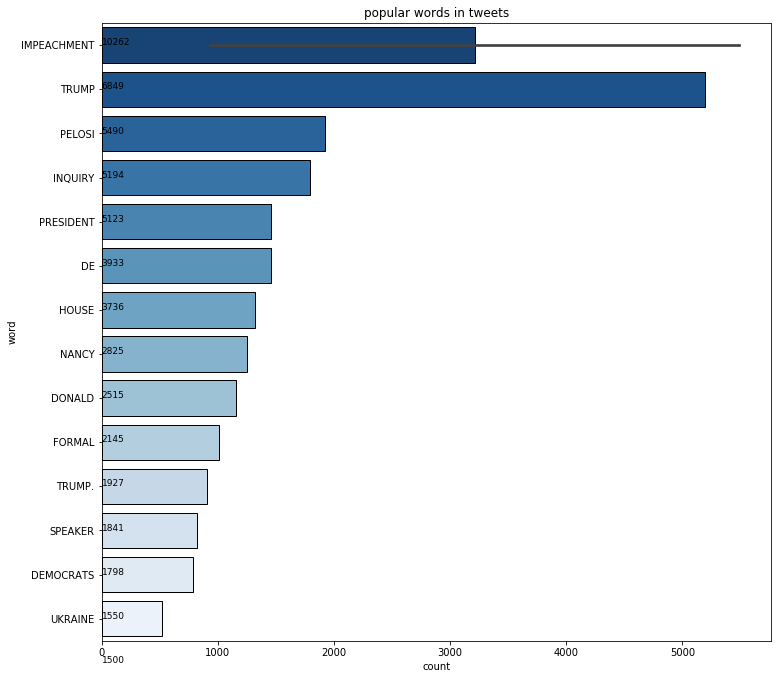

In [19]:
# Plot the visualization
import seaborn as sns
plt.figure(figsize = (12,25))
plt.subplot(211)
ax = sns.barplot(x = "count", y = "word", data = pop_wrds_t1[:15], 
                linewidth = 1, edgecolor = "k"*15, palette = "Blues_r")
plt.title("popular words in tweets")
for i,j in enumerate(pop_wrds_t["count"][:15].astype(int)) :
    ax.text(.8,i,j,fontsize = 9)

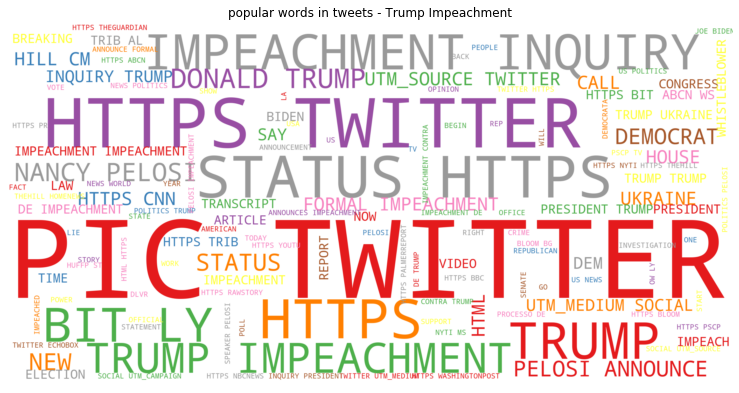

In [21]:
# word cloud
from wordcloud import WordCloud
def build_word_cloud(words,back_color,palette,title) :
    word_cloud = WordCloud(scale = 7,max_words = 1000,
                           max_font_size = 100,background_color = "white",
                           random_state = 0,colormap = palette,
                          ).generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud,interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

build_word_cloud(pop_wrds_t1["word"],"black","Set1","popular words in tweets - Trump Impeachment")

### Topic 2 - Public Opinion: What Do People Say - Sentiment Analysis of Tweets

In [22]:
data["score_compound"] = [analyzer.polarity_scores(text)["compound"] for text in list(data.tweet)]
data["score_positive"] = [analyzer.polarity_scores(text)["pos"] for text in list(data.tweet)]
data["score_negative"] = [analyzer.polarity_scores(text)["neg"] for text in list(data.tweet)]

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [23]:
print("Overall score is",data.score_compound.mean())
print("Proportion has positive words is",sum(data.score_positive!=0)/len(data.score_positive))
print("Proportion has negative words is",sum(data.score_negative!=0)/len(data.score_negative))

Overall score is -0.007932318330704902
Proportion has positive words is 0.46439403129928425
Proportion has negative words is 0.45808564842897004


NOT significant.

### Topic 3 - Word Counts and Word Clouds - Human Actions and Reactions: The Trend and Hashtag Outlets

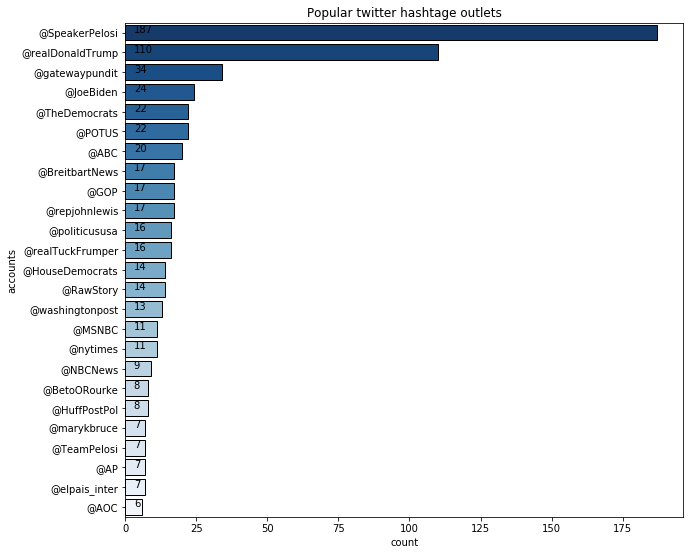

In [24]:
# Popular twitter account references
accounts_t = data["tweet"].str.extractall(r'(\@\w+)')[0].value_counts().reset_index()
accounts_t.columns = ["accounts","count"]

plt.figure(figsize = (10,20))

plt.subplot(211)
ax = sns.barplot(x = "count" , y = "accounts" ,
                 data = accounts_t[:25] , palette = "Blues_r",
                 linewidth = 1 , edgecolor = "k"* 25)
for i,j in enumerate(accounts_t["count"][:25].values) :
    ax.text(3,i,j,fontsize = 10,color = "black")
plt.title("Popular twitter hashtage outlets")

plt.show()

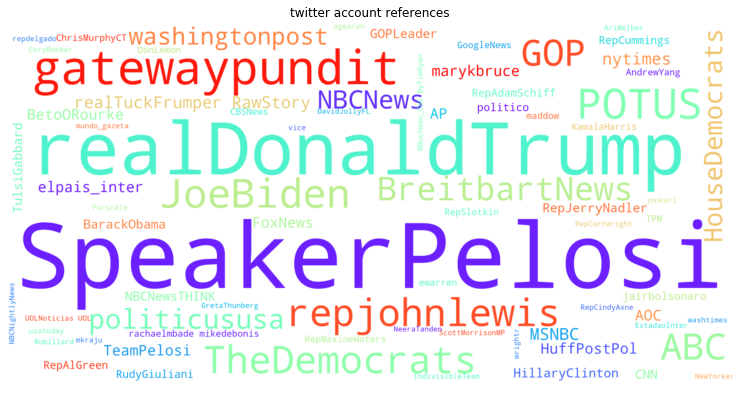

In [25]:
# wordcloud - accounts
acc_wrds_t = data["tweet"].str.extractall(r'(\@\w+)')[0]    
build_word_cloud(acc_wrds_t,"white","rainbow","twitter account references")